# Creating a dataset to detect check-worthy claims
One of the main steps of our pipeline is to recognize in a speech which claims are worth checking and which ones can be overlooked. Since no dataset on the matter exists, I decided to create one by myself. In order to do this, I used the following two sources:
 - I gathered from Politifact 10000+ statements from politicians that have been fact-checked on the website. This is the source of check-worthy sentences
 - [This dataset of movie lines](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html), which is the source of non check-worthy quotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Politifact dataset
I downloaded the statements in another notebook. Here, I'm just analyzing a few statistics.

In [ ]:
df_politifact = pd.read_csv("checkworthy_claims.csv", index_col="date", parse_dates=["date"])
df_politifact.head()

,sentence,author,target,ruling
date,,,,
2020-08-19,"Kamala Harris said, ""I don't like Joe Biden an...",Facebook posts,"['Joe Biden', 'Kamala Harris']",false
2020-08-19,"Condoleezza Rice said, ""If you are taught bitt...",Facebook posts,[],half-true
2020-08-19,"A coloring book that describes Joe Biden as ""A...",Viral image,['Joe Biden'],false
2020-08-19,"""In West Virginia alone, overdoses have increa...",Carol Miller,[],mostly-true
2020-08-18,"The United States is ""the only major industria...",Bill Clinton,[],mostly-true


### Further cleaning

The dataset requires some more cleaning to eliminate remaining HTML markups.

In [ ]:
df_politifact[df_politifact.sentence.str.startswith("<")]

,sentence,author,target,ruling
date,,,,
2020-01-31,<p>Says &quot;10% of U.S. children are Texans....,James White,[],true
2020-01-30,<p>Says drinking a bleach solution will preven...,Tweets,[],pants-fire
2020-01-30,<p>&quot;Vice President Biden threatened a for...,Rick Scott,['Joe Biden'],false
2020-01-30,<p>Says a &quot;Clorox bottle claimed it could...,Facebook posts,[],false
2020-01-30,<p>Says some of the names that may be purged f...,Robert Spindell,[],barely-true
...,...,...,...,...
2007-08-30,"<p>\""In 1972, we had a 179,000 human beings in...",Mike Gravel,[],pants-fire
2007-08-30,"<p>\""In state after state, polls make clear th...",John McCain,[],mostly-true
2007-08-24,"<p>\""The president is brain-dead.\""</p>",Joe Biden,[],pants-fire


In [ ]:
df_politifact["len"] = df_politifact["sentence"].apply(lambda row: len(row))
df_politifact[df_politifact['len'] > 400]["sentence"].values

array(['Condoleezza Rice said, "If you are taught bitterness and anger, then you will believe you are a victim. You will feel aggrieved and the twin brother of aggrievement is entitlement. So now you think you are owed something and you don\'t have to work for it and now you\'re on a really bad road to nowhere because there are people who will play to that sense of victimhood, aggrievement and entitlement, and you still won\'t have a job."',
       '<p>&quot;When the Senate was debating middle-class affordability for child care,&quot; then-Sen. Joe Biden &quot;voted against it, the only vote, but what he wrote (in) an op-ed was that he believed that women working outside the home would, quote, &lsquo;create the deterioration of family.&rsquo; He also said that women who were working outside the home were, quote, &lsquo;avoiding responsibility.&rsquo;&quot;</p>\\n\\n<p>&nbsp;</p>',
       '<p>&quot;As a 27 year old staff attorney for the House Judiciary Committee during the Watergate in

In [ ]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

df_politifact["clean_sentence"] = df_politifact["sentence"].apply(cleanhtml)

In [ ]:
df_politifact["clean_sentence"]

date
2020-08-19    Kamala Harris said, "I don't like Joe Biden an...
2020-08-19    Condoleezza Rice said, "If you are taught bitt...
2020-08-19    A coloring book that describes Joe Biden as "A...
2020-08-19    "In West Virginia alone, overdoses have increa...
2020-08-18    The United States is "the only major industria...
                                    ...                        
2007-06-22    \"If we increase fuel efficiency standards to ...
2007-06-21    \"Both China and Japan have surpassed us, with...
2007-06-19    New Mexico moved \"up to\" sixth in the nation...
2007-06-12    For every single scientist that tells you (glo...
2007-06-12    \"New Mexico was 46th in teacher pay (when he ...
Name: clean_sentence, Length: 17580, dtype: object

In [ ]:
df_politifact[df_politifact['len'] > 400]

,sentence,author,target,ruling,len,clean_sentence
date,,,,,,
2020-08-19,"Condoleezza Rice said, ""If you are taught bitt...",Facebook posts,[],half-true,432,"Condoleezza Rice said, ""If you are taught bitt..."
2019-08-02,<p>&quot;When the Senate was debating middle-c...,Kirsten Gillibrand,['Joe Biden'],half-true,435,When the Senate was debating middle-class affo...
2018-10-22,<p>&quot;As a 27 year old staff attorney for t...,Bloggers,[],false,504,As a 27 year old staff attorney for the House ...
2018-07-25,<p><strong>&quot;President Trump proposed the ...,Corey Stewart,[],barely-true,413,President Trump proposed the increase to $700 ...
2017-10-20,<p>At a 2015 dedication of an FBI building in ...,John Kelly,['Frederica Wilson'],false,412,At a 2015 dedication of an FBI building in Flo...
...,...,...,...,...,...,...
2010-06-25,"<p><span id=\""internal-source-marker_0.2732285...",Frank Caprio,['Frank Caprio'],half-true,592,"If every small business in our state, on aver..."
2010-06-25,"<p><span id=\""internal-source-marker_0.6924982...",Michael J. Gardiner,['James Langevin'],pants-fire,806,U.S. Rep. Jim Langevin didn't want a border f...
2010-06-25,"<p><span id=\""internal-source-marker_0.8578156...",Jeff Chapman,[],true,534,Georgia has more illegal aliens than the state...


### Analysis on the dataset

In [ ]:
df_politifact["len"] = df_politifact["clean_sentence"].apply(lambda row: len(row))

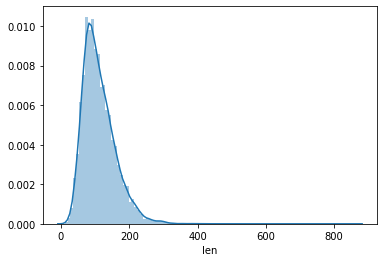

In [ ]:
sns.distplot(df_politifact["len"], bins=100)

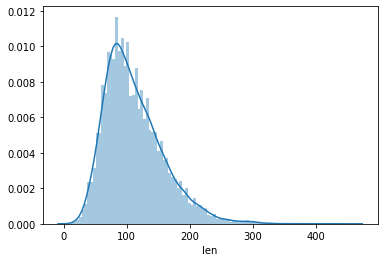

In [ ]:
sns.distplot(df_politifact[df_politifact["len"]<500]["len"], bins=100)

In [ ]:
df_politifact[df_politifact["len"] > 350]

,sentence,author,target,ruling,len,clean_sentence
date,,,,,,
2020-08-19,"Condoleezza Rice said, ""If you are taught bitt...",Facebook posts,[],half-true,432,"Condoleezza Rice said, ""If you are taught bitt..."
2019-08-02,<p>&quot;When the Senate was debating middle-c...,Kirsten Gillibrand,['Joe Biden'],half-true,363,When the Senate was debating middle-class affo...
2018-10-22,<p>&quot;As a 27 year old staff attorney for t...,Bloggers,[],false,454,As a 27 year old staff attorney for the House ...
2018-07-25,<p><strong>&quot;President Trump proposed the ...,Corey Stewart,[],barely-true,377,President Trump proposed the increase to $700 ...
2017-10-20,<p>At a 2015 dedication of an FBI building in ...,John Kelly,['Frederica Wilson'],false,393,At a 2015 dedication of an FBI building in Flo...
2017-05-22,<p>&quot;It was a 100 percent lie that (Donald...,Dennis Prager,[],half-true,357,It was a 100 percent lie that (Donald Trumps) ...
2014-05-02,<p><strong>The Cathedral of Christ the King is...,Wilton Gregory,[],mostly-true,862,The Cathedral of Christ the King is one of the...
2013-06-06,"<p dir=\""ltr\"" id=\""docs-internal-guid-52bb7ce...",Republican Governors Association,['Barbara Buono'],mostly-true,406,\r\n\tBarbara Buono by the numbers: As a Trent...
2012-12-16,<p>\r\n\t&quot;Right now one of our highest jo...,Lou Greenwald,[],mostly-true,380,\r\n\tRight now one of our highest job growth ...


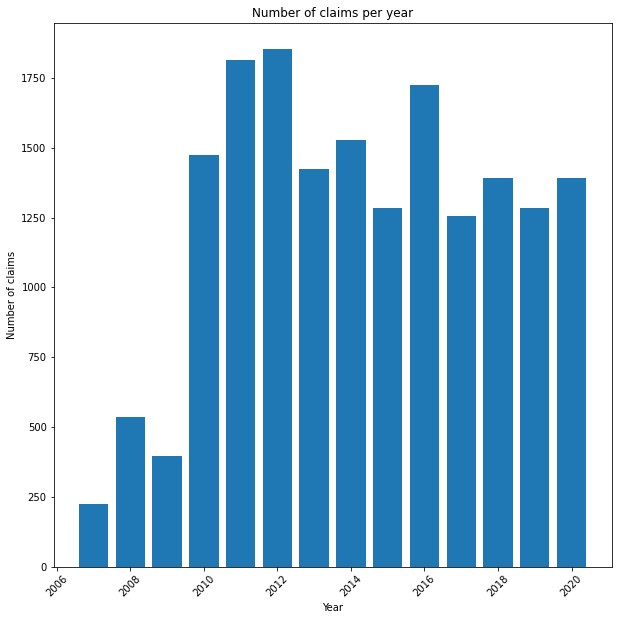

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

df_grouped = df_politifact.groupby(pd.Grouper(freq='Y', label='right')).count()
ax.bar(x=df_grouped.index.year, height=df_grouped['sentence'])
ax.set(xlabel="Year", ylabel="Number of claims", title="Number of claims per year")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

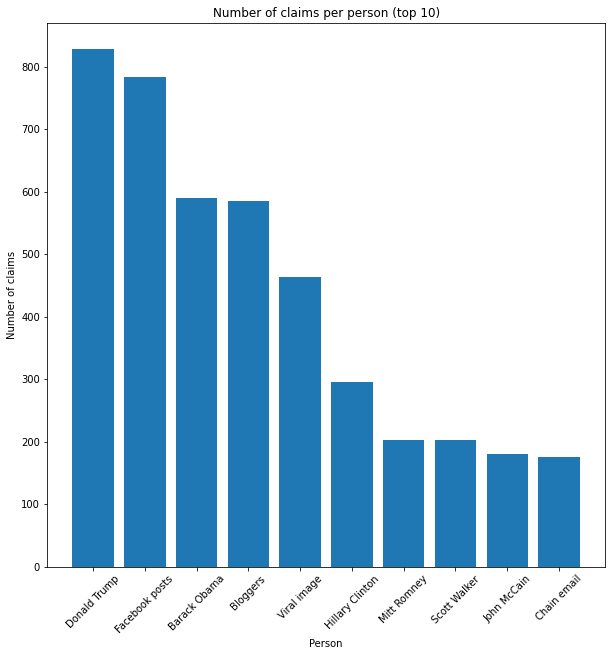

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

df_grouped = df_politifact.groupby(by="author").count().sort_values(by="sentence", ascending=False)[:10]
ax.bar(x=df_grouped.index.values, height=df_grouped['sentence'])
ax.set(xlabel="Person", ylabel="Number of claims", title="Number of claims per person (top 10)")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

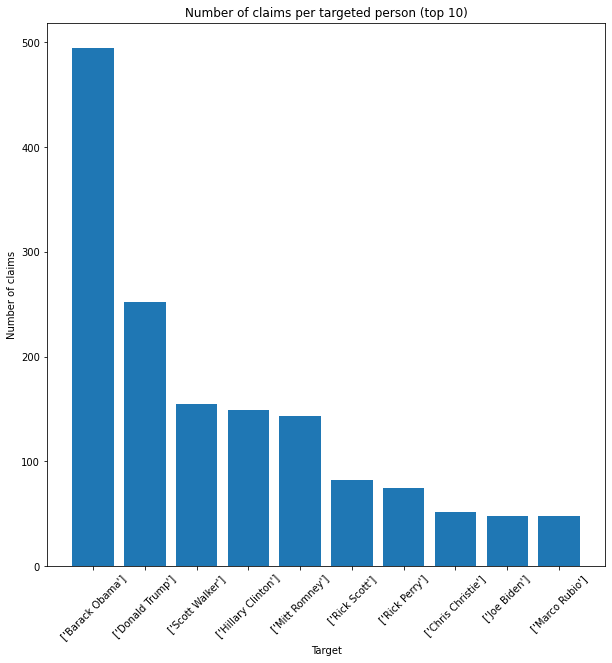

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

df_grouped = df_politifact[df_politifact['target'] != '[]'].groupby(by="target").count().sort_values(by="sentence", ascending=False)[:10]
ax.bar(x=df_grouped.index.values, height=df_grouped['sentence'])
ax.set(xlabel="Target", ylabel="Number of claims", title="Number of claims per targeted person (top 10)")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

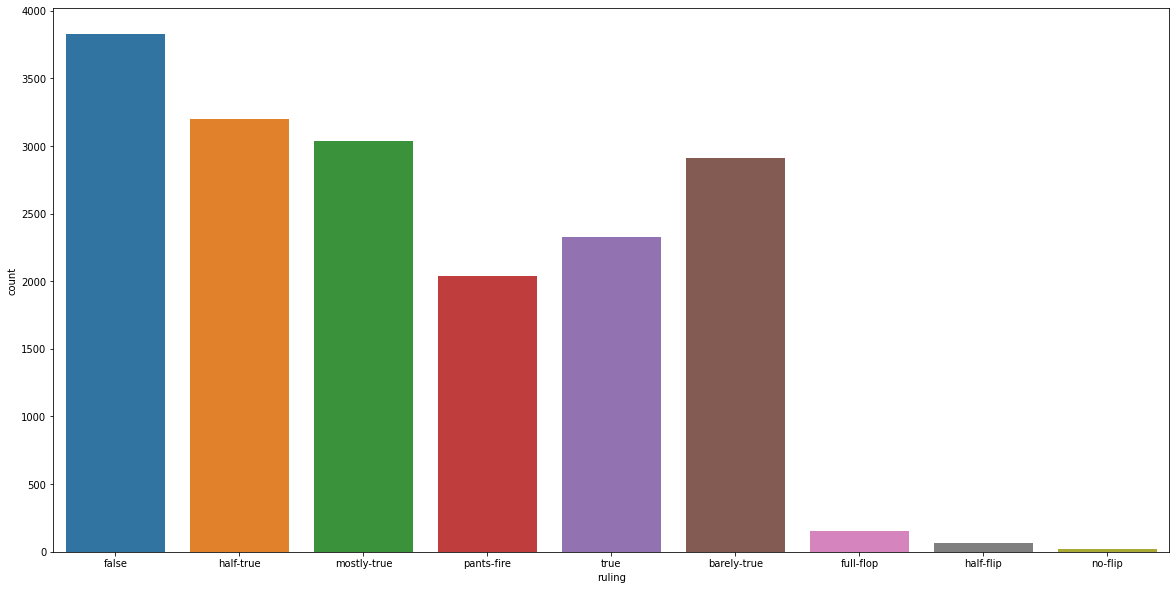

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="ruling", data=df_politifact)

In [ ]:
df_politifact['ruling_simple'] = df_politifact['ruling'].apply(lambda row: "false" if row == "false" or row == "pants-fire" or row == "full-flop" or row == "barely-true" else "true")

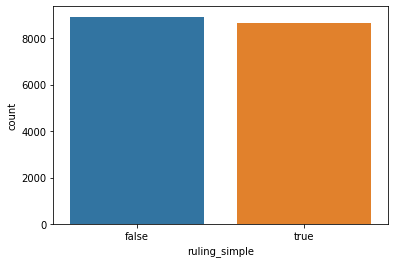

In [ ]:
ax = sns.countplot(x="ruling_simple", data=df_politifact)

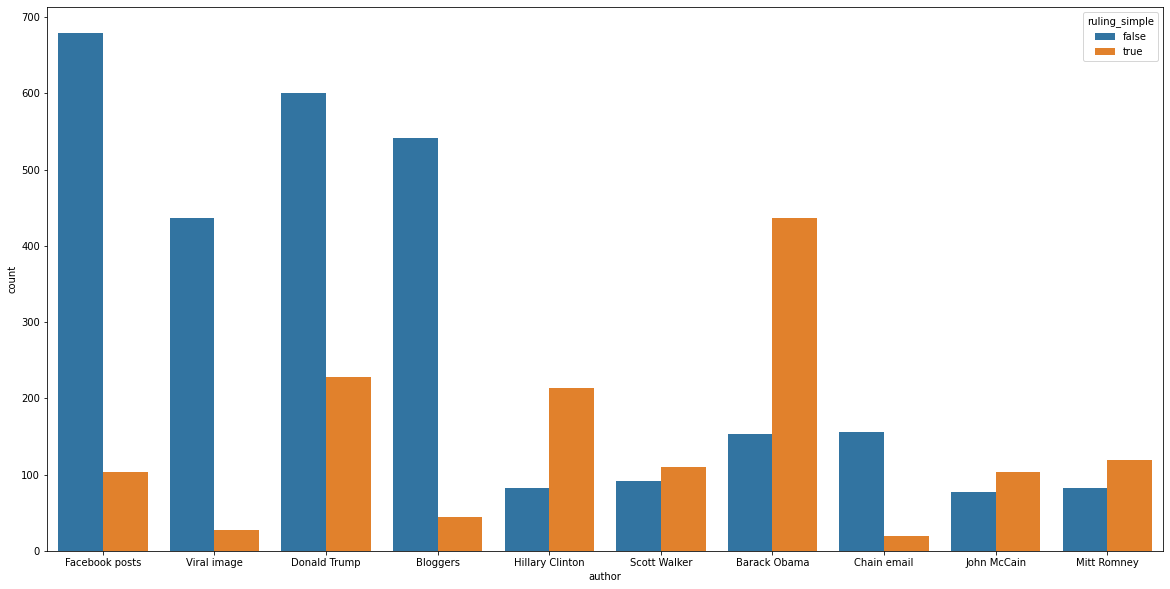

In [ ]:
plt.figure(figsize=(20,10))
top10_author = df_politifact.groupby(by="author").count().sort_values(by="sentence", ascending=False)[:10].index
ax = sns.countplot(x="author", data=df_politifact[df_politifact['author'].isin(top10_author)], hue="ruling_simple")

## Movie lines dataset
The dataset can be downloaded from [here](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). It is formed by 4 txt files containing not only the scripts, but also info on movie and characters.

In [ ]:
!unrar e movie_lines.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from movie_lines.rar


Would you like to replace the existing file movie_lines.txt
34641919 bytes, modified on 2010-12-17 01:20
with a new one
34641919 bytes, modified on 2010-12-17 01:20

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit n

No files to extract


First we need to clean the dataset, before transrming it into a pandas DataFrame.

In [ ]:
lines_raw = []
with open("movie_lines.txt", "rb") as f:
  for line_raw in f.readlines():
    lines_raw.append(line_raw)

In [ ]:
lines = []

for line_raw in lines_raw:
  try:
    line_raw = str(line_raw)
  except Exception as e:
    print("Error")
    continue
  
  line_split = line_raw.split("+")
  line_split = list(filter(lambda x: x != '' and x != '$', line_split))
  line = {}
  line["line"] = line_split[-1][:-3]
  line["character"] = line_split[-2]
  line["movie_id"] = line_split[2].replace(" ","")
  line["len"] = len(line["line"])
  lines.append(line)

In [ ]:
df_movie = pd.DataFrame(lines)
print(len(df_movie))
df_movie.head()

304713


,line,character,movie_id,len
0,They do not!,BIANCA,m0,13
1,They do to!,CAMERON,m0,12
2,I hope so.,BIANCA,m0,11
3,She okay?,CAMERON,m0,10
4,Let's go.,BIANCA,m0,10


We also need to add info on the movies, before eliminating some of the rows to get a balanced final dataset.

In [ ]:
movies_raw = []
with open("movie_titles_metadata.txt", "rb") as f:
  for movie_raw in f.readlines():
    movies_raw.append(movie_raw)

In [ ]:
movies = []

for movie_raw in movies_raw:
  try:
    movie_raw = str(movie_raw)
  except Exception as e:
    print("Error")
    continue
  
  movie_split = movie_raw.split("+")
  movie_split = list(filter(lambda x: x != '' and x != '$', movie_split))
  movie = {}
  movie["movie_id"] = movie_split[0][2:].replace(" ", "")
  movie["title"] = movie_split[1]
  movie["score"] = movie_split[3]
  movie["genres"] = movie_split[-1][:-3]
  movies.append(movie)

In [ ]:
df_movie_info = pd.DataFrame(movies)
print(len(df_movie_info))
df_movie_info.head()

617


,movie_id,title,score,genres
0,m0,10 things i hate about you,6.90,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,6.20,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,6.10,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,8.40,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,6.90,"['action', 'comedy', 'crime', 'drama', 'thril..."


In [ ]:
df_lines = pd.merge(df_movie, df_movie_info, on='movie_id')

In [ ]:
df_lines.head()

,line,character,movie_id,len,title,score,genres
0,They do not!,BIANCA,m0,13,10 things i hate about you,6.90,"['comedy', 'romance']"
1,They do to!,CAMERON,m0,12,10 things i hate about you,6.90,"['comedy', 'romance']"
2,I hope so.,BIANCA,m0,11,10 things i hate about you,6.90,"['comedy', 'romance']"
3,She okay?,CAMERON,m0,10,10 things i hate about you,6.90,"['comedy', 'romance']"
4,Let's go.,BIANCA,m0,10,10 things i hate about you,6.90,"['comedy', 'romance']"


## Creating a balanced dataset
The movie dataset is much larger than the one from Politifact, so we'll need to remove some of its rows before creating the final one.

In [ ]:
print("Politifact: {0} rows".format(len(df_politifact)))
print("Movie dataset: {0} rows".format(len(df_lines)))

Politifact: 17580 rows
Movie dataset: 304713 rows


One way to reduce dimension of the movie dataset is to remove lines based on their lengths. For this purpose, we remove lines with less than 75 and more than 500 characters

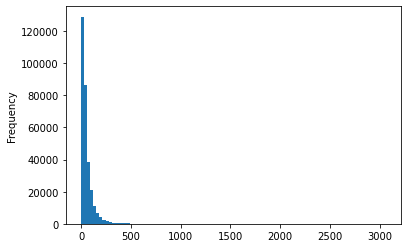

In [ ]:
df_lines['len'].plot(kind='hist', bins=100)

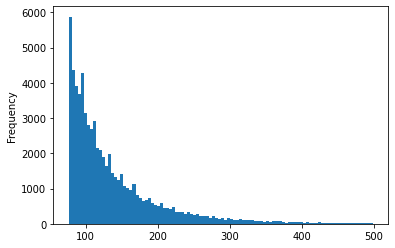

In [ ]:
df_lines = df_lines[(df_lines['len'] > 75) & (df_lines['len'] < 500)]
df_lines['len'].plot(kind='hist', bins=100)

In [ ]:
print("New length: ", len(df_lines))

New length:  67408


Another possible way is to eliminate lines coming from movies with low scores. These movies are more likely to have bad scripts, so they might bias our analysis. A good threshold could be having a score of 7.0

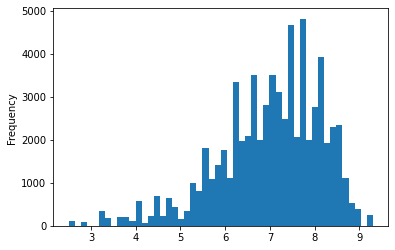

In [ ]:
df_lines['score'].astype(float).plot(kind='hist', bins=50)

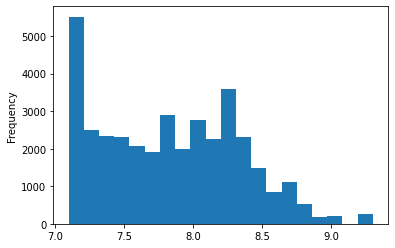

In [ ]:
df_lines = df_lines[df_lines['score'].astype(float) > 7.0]
df_lines['score'].astype(float).plot(kind='hist', bins=20)

In [ ]:
print("New length: ", len(df_lines))

New length:  37028


Finally the genre could help us. Movies that are fantasy or historic might contain unusual terms that aren't likely to be used in a normal speech.

In [ ]:
df_lines['genres'].unique()

array([" ['adventure', 'mystery', 'sci-fi']",
       " ['action', 'adventure', 'romance', 'sci-fi', 'thriller']",
       " ['comedy', 'romance']", " ['action', 'sci-fi', 'thriller']",
       " ['biography', 'drama', 'music']", " ['horror', 'romance']",
       " ['drama']", " ['drama', 'thriller']",
       " ['action', 'adventure', 'comedy', 'crime']",
       " ['drama', 'romance', 'war']",
       " ['adventure', 'drama', 'fantasy']",
       " ['drama', 'sci-fi', 'thriller']",
       " ['crime', 'mystery', 'thriller']",
       " ['action', 'crime', 'drama', 'thriller']",
       " ['comedy', 'crime']",
       " ['action', 'adventure', 'mystery', 'thriller']",
       " ['action', 'biography', 'drama', 'history', 'war']",
       " ['drama', 'mystery', 'sci-fi', 'thriller']",
       " ['adventure', 'drama']", " ['drama', 'romance']",
       " ['crime', 'drama']", " ['drama', 'mystery', 'sci-fi']",
       " ['comedy', 'musical']", " ['biography', 'drama', 'history']",
       " ['drama', 'rom

In [ ]:
genres_to_remove = ["history", "sci-fi", "fantasy", "horror"]

for genre in genres_to_remove:
  df_lines[genre] = df_lines["genres"].apply(lambda row: 1 if genre in row else 0)

df_lines["is_genre_to_remove"] = df_lines.apply(lambda row: 1 if row['history'] == 1 or row['sci-fi'] == 1 or row['fantasy'] == 1 or row['horror'] == 1 else 0, axis=1)

<BarContainer object of 4 artists>

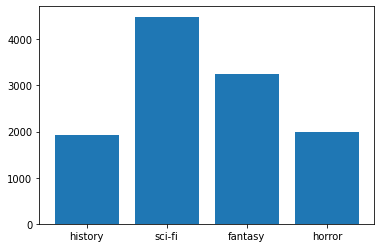

In [ ]:
number_of_movies_per_genre = []

for genre in genres_to_remove:
  number_of_movies_per_genre.append(len(df_lines[df_lines[genre] == 1]))

plt.bar(genres_to_remove, number_of_movies_per_genre)

In [ ]:
df_lines = df_lines[df_lines["is_genre_to_remove"] == 0]
print("New length: ", len(df_lines))

New length:  26710


The movie dataset is now ready. The lengths of the two datasets are comparable (The dataset from Politifact will be enlarged through more scraping from the website with an estimated 18000 statements in the end)

In [ ]:
df_worthy = df_politifact[["clean_sentence","len"]]
df_worthy = df_worthy.rename(columns={"clean_sentence":"sentence"})
df_worthy["worthy"] = 1

df_unworthy = df_lines[["line","len"]]
df_unworthy = df_unworthy.rename(columns={"line":"sentence"})
df_unworthy["worthy"] = 0

In [ ]:
df_final = pd.concat([df_worthy, df_unworthy])
df_final.to_csv("worthy_dataset.csv", index=False)

## Analysis on the final dataset
Let's do a summary of our final dataset

In [ ]:
df_final = pd.read_csv("worthy_dataset.csv")
df_final.head()

,sentence,len,worthy
0,"Kamala Harris said, ""I don't like Joe Biden an...",136,1
1,"Condoleezza Rice said, ""If you are taught bitt...",432,1
2,"A coloring book that describes Joe Biden as ""A...",103,1
3,"""In West Virginia alone, overdoses have increa...",88,1
4,"The United States is ""the only major industria...",131,1


In [ ]:
print("Total lenght: ", len(df_final))
print("Number of check-worthy claims: ", len(df_final[df_final["worthy"] == 1]))
print("Number of non check-worthy claims: ", len(df_final[df_final["worthy"] == 0]))

Total lenght:  44290
Number of check-worthy claims:  17580
Number of non check-worthy claims:  26710


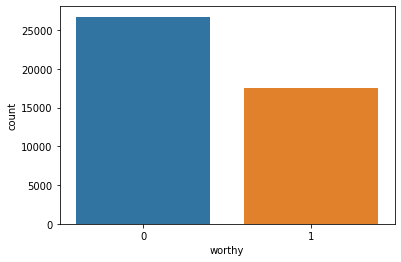

In [ ]:
ax = sns.countplot(x="worthy", data=df_final)

In [ ]:
df_final['len'].describe()

count    44290.000000
mean       129.149221
std         64.182777
min         11.000000
25%         87.000000
50%        111.000000
75%        151.000000
max        862.000000
Name: len, dtype: float64

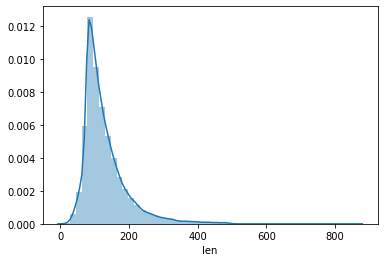

In [ ]:
ax = sns.distplot(df_final["len"])

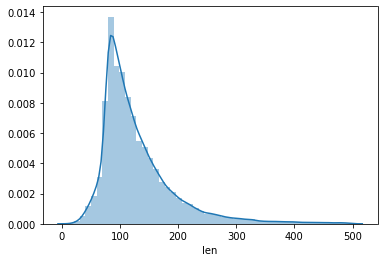

In [ ]:
ax = sns.distplot(df_final[df_final["len"] < 500]["len"])

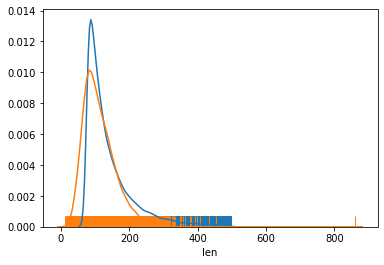

In [ ]:
sns.distplot(df_final[df_final["worthy"] == 0]["len"], hist=False, rug=True)
sns.distplot(df_final[df_final["worthy"] == 1]["len"], hist=False, rug=True)

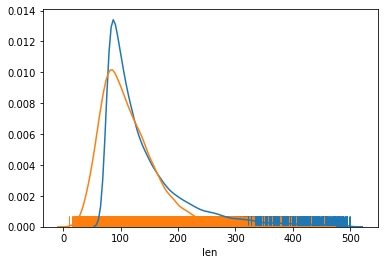

In [ ]:
sns.distplot(df_final[(df_final["worthy"] == 0) & (df_final["len"] < 500)]["len"], hist=False, rug=True)
sns.distplot(df_final[(df_final["worthy"] == 1) & (df_final["len"] < 500)]["len"], hist=False, rug=True)

## Training a classifier
The final step is to train a classifier. For this purpose, we will be using [ktrain](https://github.com/amaiya/ktrain), a library that simplifies the training of BERT.

In [ ]:
!pip3 install -q tensorflow_gpu==2.1.0

     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 3.9MB 58.7MB/s 
     |████████████████████████████████| 450kB 60.2MB/s 
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [ ]:
!pip3 install -q ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 421.8MB 43kB/s 
     |████████████████████████████████| 983kB 56.7MB/s 
     |████████████████████████████████| 245kB 57.4MB/s 
     |████████████████████████████████| 778kB 55.1MB/s 
     |████████████████████████████████| 471kB 54.9MB/s 
     |████████████████████████████████| 1.1MB 52.0MB/s 
     |████████████████████████████████| 890kB 55.8MB/s 
     |████████████████████████████████| 3.0MB 55.6MB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import ktrain
from ktrain import text

(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=df_final, 
                                                                   text_column='sentence',
                                                                   label_columns=["worthy"],
                                                                   val_pct=0.2, 
                                                                   max_features=100000, 
                                                                   maxlen=75,
                                                                   preprocess_mode='bert',
                                                                   ngram_range=3)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc, )

Is Multi-Label? False
maxlen is 75
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

In [ ]:
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train on 35432 samples, validate on 8858 samples
Epoch 1/4
35432/35432 [==============================] - 652s 18ms/sample - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0180 - val_accuracy: 0.9938
Epoch 2/4
35432/35432 [==============================] - 633s 18ms/sample - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0117 - val_accuracy: 0.9963
Epoch 3/4
35432/35432 [==============================] - 633s 18ms/sample - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0127 - val_accuracy: 0.9975
Epoch 4/4
35432/35432 [==============================] - 633s 18ms/sample - loss: 4.0252e-04 - accuracy: 0.9999 - val_loss: 0.0149 - val_accuracy: 0.9971


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=preproc)

In [ ]:
predictor.predict("Hi! How are you?")

'not_worthy'

In [ ]:
predictor.predict("The US added 7 million jobs last month")

'worthy'

In [ ]:
predictor.predict("Democrats want to defund police")

'worthy'

In [ ]:
predictor.predict("I wasn't expecting so many people")

'not_worthy'

In [ ]:
learner.view_top_losses(n=1, preproc=preproc)

----------
id:4078 | loss:12.23 | true:worthy | pred:not_worthy)

[CLS] under the cash for cl ##unk ##ers program , all we ' ve got to do is . . . go to a local junk ##yard , all you ' ve got to do is tow it to your house . and you ' re going to get $ 4 , 500 . [SEP]


In [ ]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
speech = 'Madam President, Mr. Secretary-General, world leaders, ambassadors, and distinguished delegates: One year ago, I stood before you for the first time in this grand hall. I addressed the threats facing our world, and I presented a vision to achieve a brighter future for all of humanity. Today, I stand before the United Nations General Assembly to share the extraordinary progress we’ve made. In less than two years, my administration has accomplished more than almost any administration in the history of our country. Didn’t expect that reaction, but that’s okay. (Laughter and applause.) America’s economy is booming like never before. Since my election, we’ve added $10 trillion in wealth. The stock market is at an all-time high in history, and jobless claims are at a 50-year low. African American, Hispanic American, and Asian American unemployment have all achieved their lowest levels ever recorded. We’ve added more than 4 million new jobs, including half a million manufacturing jobs. We have passed the biggest tax cuts and reforms in American history. We’ve started the construction of a major border wall, and we have greatly strengthened border security. We have secured record funding for our military — $700 billion this year, and $716 billion next year. Our military will soon be more powerful than it has ever been before. In other words, the United States is stronger, safer, and a richer country than it was when I assumed office less than two years ago. We are standing up for America and for the American people. And we are also standing up for the world. This is great news for our citizens and for peace-loving people everywhere. We believe that when nations respect the rights of their neighbors, and defend the interests of their people, they can better work together to secure the blessings of safety, prosperity, and peace. Each of us here today is the emissary of a distinct culture, a rich history, and a people bound together by ties of memory, tradition, and the values that make our homelands like nowhere else on Earth. That is why America will always choose independence and cooperation over global governance, control, and domination. I honor the right of every nation in this room to pursue its own customs, beliefs, and traditions. The United States will not tell you how to live or work or worship. We only ask that you honor our sovereignty in return.'

In [ ]:
sentences_text = nltk.sent_tokenize(speech)

In [ ]:
for sentence in sentences_text:
  print("Sentence: ", sentence)
  print("Worthiness likelihood: {:.2f}".format(predictor.predict_proba(sentence)[1]))
  print("Response: ", predictor.predict(sentence))
  print("\n")

Sentence:  Madam President, Mr. Secretary-General, world leaders, ambassadors, and distinguished delegates: One year ago, I stood before you for the first time in this grand hall.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  I addressed the threats facing our world, and I presented a vision to achieve a brighter future for all of humanity.


Worthiness likelihood: 0.03


Response:  not_worthy


Sentence:  Today, I stand before the United Nations General Assembly to share the extraordinary progress we’ve made.


Worthiness likelihood: 0.01


Response:  not_worthy


Sentence:  In less than two years, my administration has accomplished more than almost any administration in the history of our country.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  Didn’t expect that reaction, but that’s okay.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  (Laughter and applause.)


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  America’s economy is booming like never before.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  Since my election, we’ve added $10 trillion in wealth.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  The stock market is at an all-time high in history, and jobless claims are at a 50-year low.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  African American, Hispanic American, and Asian American unemployment have all achieved their lowest levels ever recorded.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  We’ve added more than 4 million new jobs, including half a million manufacturing jobs.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  We have passed the biggest tax cuts and reforms in American history.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  We’ve started the construction of a major border wall, and we have greatly strengthened border security.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  We have secured record funding for our military — $700 billion this year, and $716 billion next year.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  Our military will soon be more powerful than it has ever been before.


Worthiness likelihood: 0.30


Response:  not_worthy


Sentence:  In other words, the United States is stronger, safer, and a richer country than it was when I assumed office less than two years ago.


Worthiness likelihood: 0.13


Response:  not_worthy


Sentence:  We are standing up for America and for the American people.


Worthiness likelihood: 1.00


Response:  worthy


Sentence:  And we are also standing up for the world.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  This is great news for our citizens and for peace-loving people everywhere.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  We believe that when nations respect the rights of their neighbors, and defend the interests of their people, they can better work together to secure the blessings of safety, prosperity, and peace.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  Each of us here today is the emissary of a distinct culture, a rich history, and a people bound together by ties of memory, tradition, and the values that make our homelands like nowhere else on Earth.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  That is why America will always choose independence and cooperation over global governance, control, and domination.


Worthiness likelihood: 0.91


Response:  worthy


Sentence:  I honor the right of every nation in this room to pursue its own customs, beliefs, and traditions.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  The United States will not tell you how to live or work or worship.


Worthiness likelihood: 0.00


Response:  not_worthy


Sentence:  We only ask that you honor our sovereignty in return.


Worthiness likelihood: 0.00


Response:  not_worthy




In [ ]:
predictor.save('/tmp/worthy_predictor')

## Save model to Drive

In [ ]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

In [ ]:
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
  }

  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)

  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  print('File ID: {}'.format(created.get('id')))

  return created

In [ ]:
save_file_to_drive("tf_model.h5", '/tmp/worthy_predictor/tf_model.h5')

File ID: 1HuO7T_dotFQKpITZeXP2u31bX6ibKu9R


{'id': '1HuO7T_dotFQKpITZeXP2u31bX6ibKu9R'}